Úkol 2

Ve strojovém učení často pracujeme i s jinými než textovými daty, například s obrázky. Práci s obrázky si vyzkoušíš v tomto úkolu. Jedním z nejznámějších datasetů je MNIST, který obsahuje obrázky rukou psaných číslic. K obrázkou jsou k dispozici i labels, tj. čísla, která na obrázku jsou. Tento dataset je přímo součástí modulu scikitlearn, a to ve formě číselné matice. Obrázky mají nízké rozlišení (8x8 pixelů, tj. každý obrázek se skládá 64 "políček" - 8 políček v 8 řádích, kterým lze přiřadit barvu) a je černobílý.

Tvým úkolem bude vytvořit model, který dokáže rozpoznat, jaké číslo je na každém z obrázků, přičemž využijeme algoritmus Support Vector Machine (SVM). Dataset si můžeš načíst s využitím následujícího kódu. Kód uloží data, která chceme zpracovat, do proměnné data. Čísla, která na obrázích skutečně jsou (tj. správné odpovědi) jsou v proměnné y.

Rozděl data na testovací a trénovací pomocí metody train_test_split, přičemž nastav parametry test_size=0.3 a random_state=42. 

Použij stejné názvy proměnných, jaké jsme používali v lekci, tj. X_train, X_test, y_train, y_test.

Použij klasifikátor SVC a jako kernel použij linear. Parametr decision_function_shape nenastavuj a využij výchozí hodnotu, tj. ovo. Nenastavuj ani žádné další parametry.

Natrénuj model s využitím metody fit() a nakonec metodou predict() vytvoř pole predikcí pro testovací data, které pojmenuj y_pred.
Zjisti hodnotu metriky accuracy (měla by ti vyjít přibližně 0.9796) a matici záměn.

0.9777777777777777

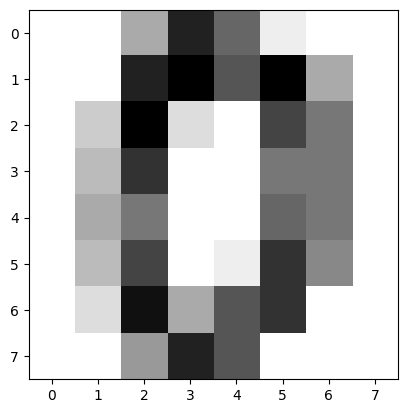

In [55]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC, SVC

digits = datasets.load_digits()
y = digits.target
data = digits.images
plt.imshow(data[0], cmap=plt.cm.gray_r)
y[0]
n_samples = len(data)
X = data.reshape([n_samples, -1])

test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

model = SVC(kernel="linear")

scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train)
X_test_2 = scaler.transform(X_test)


clf = GridSearchCV(model, param_grid={}, scoring="accuracy")
clf.fit(X_train_2, y_train)

accuracy = clf.score(X_test_2, y_test)
accuracy

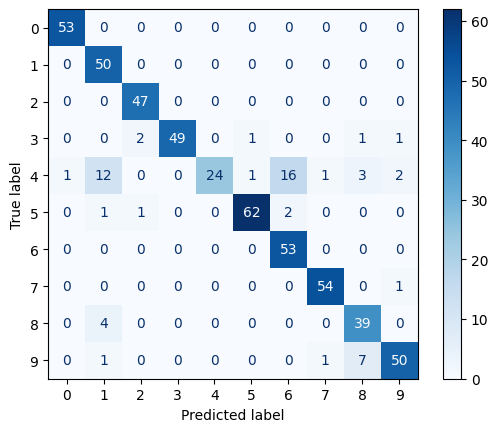

In [56]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
)